In [ ]:
<< "MaTeX`"
<< "~/Documents/Wolfram Mathematica/Wolfram_scripts/Optics_Mie.wls"
<< "~/Documents/Wolfram Mathematica/Wolfram_scripts/Optical_functions/Au_JohnsnChristy.wls"
<< "~/Documents/Wolfram Mathematica/Wolfram_scripts/jet_jet-extended.wls"

In [4]:
fs = 9;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3]}
            
SetOptions[ListLinePlot, graphsOpts];

graphsOptsPolar := {Mesh -> Full, BaseStyle -> texStyle,  PolarAxes -> True ,
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3], Frame -> False, PolarGridLines -> Automatic, Joined -> True}
SetOptions[ListPolarPlot, graphsOptsPolar];

### Vector Spherical Harmonics

In [11]:
CartesianToSpherical = {{Sin[#1]*Cos[#2],Sin[#1]*Sin[#2], Cos[#1]},
                        {Cos[#1]*Cos[#2],Cos[#1]*Sin[#2], -Sin[#1]},
                        {-Sin[#2],Cos[#2], 0}}& ;
SphericalToCartesian = Transpose[CartesianToSpherical[#1,#2]]& ;

MieVectorSphericalHarmonic::PhysicalSolution = "The only radial dependency in the Mie Theory is given by SphericalBesselJ (1) and the SphericalHankelH1 (3)."
MieVectorSphericalHarmonic::CoordinateSystem = "The coordinate system must be either the cartesian or spherical coordinate system."
MieVectorSphericalHarmonic::VectorBase = "The vector base system must be either the cartesian or spherical canonical vector system."
MieVectorSphericalHarmonic::Int = "The parameter `1 must be an integer or a list of int."

The only radial dependency in the Mie Theory is given by SphericalBesselJ (1) and the\
 
>   SphericalHankelH1 (3).
The coordinate system must be either the cartesian or spherical coordinate system.
The vector base system must be either the cartesian or spherical canonical vector\
 
>   system.
The parameter `1 must be an integer or a list of int.

In [17]:
Options[MieVectorSphericalHarmonicMo1] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
                                            
MieVectorSphericalHarmonicMo1[super_Integer, nn_ , point_List, wavenumber_, OptionsPattern[]]:= Module[{n, bessel, rho, theta, phi, VSH, etheta, ephi},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    {etheta, ephi} = Transpose[Drop[IdentityMatrix[3],1]& /@ n]; 
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];

    {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                                "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                                "Spherical", point,
                                _, Return[Message[MieVectorSphericalHarmonic::CoordinateSystem]]];
                              
    VSH  = Cos[phi] * MiePi[n, Cos[theta] ] * etheta - Sin[phi] * MieTau[n, Cos[theta] ]* ephi;
    VSH *= bessel[n, wavenumber * rho];
    VSH = Switch[OptionValue["OutputVectorBase"],
                            "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VSH],
                            "Spherical", VSH,
                            _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, 
        VSH[[1]], 
        VSH ]]

MieVectorSphericalHarmonicMo1[3,1, 60*{1,1,1}, 1.]
MieVectorSphericalHarmonicMo1[3,1, 60*{1,1,1}, 1., "OutputVectorBase" -> "Spherical"]

{0.00536892 + 0.0014289 I, 0. + 0. I, -0.00536892 - 0.0014289 I}
{0. + 0. I, 0.00657556 + 0.00175004 I, -0.0037964 - 0.00101038 I}

In [22]:
Options[MieVectorSphericalHarmonicMe1] = {"InputCoordinateSystem"->"Cartesian", 
                                            "OutputVectorBase" -> "Cartesian"};
                                                    
MieVectorSphericalHarmonicMe1[super_Integer, nn_, point_List, wavenumber_, OptionsPattern[]]:= Module[{n, bessel, rho, theta, phi, VSH, etheta, ephi},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    {etheta, ephi} = Transpose[Drop[IdentityMatrix[3],1]& /@ n]; 
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];

    {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                                "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                                "Spherical", point,
                                _, Return[Message[MieVectorSphericalHarmonic::CoordinateSystem]]];
                                      
   VSH  = -Sin[phi] * MiePi[n, Cos[theta]] * etheta - Cos[phi] * MieTau[n, Cos[theta]]* ephi;
   VSH *= bessel[n, wavenumber * rho];
   VSH = Switch[OptionValue["OutputVectorBase"],
                           "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VSH],
                           "Spherical", VSH,
                           _, Message[MieVectorSphericalHarmonic::VectorBase]];
   If[Length[nn] == 0, 
       VSH[[1]], 
       VSH ]]
       
MieVectorSphericalHarmonicMe1[3,1, 60.*{1,1,1}, 1]
MieVectorSphericalHarmonicMe1[3,1, 60.*{1,1,1}, 1, "OutputVectorBase" -> "Spherical"]

-19
{0. - 1.0842 10    I, -0.00536892 - 0.0014289 I, 0.00536892 + 0.0014289 I}
{0. + 0. I, -0.00657556 - 0.00175004 I, -0.0037964 - 0.00101038 I}

In [28]:
 Options[MieVectorSphericalHarmonicNo1] = {"InputCoordinateSystem"->"Cartesian", "OutputVectorBase" -> "Cartesian"};
MieVectorSphericalHarmonicNo1[super_Integer, nn_, point_List, wavenumber_, OptionsPattern[]]:= Module[{n, bessel, rho, theta, phi, VSH, etheta, ephi, er},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    {er, etheta, ephi} = Transpose[IdentityMatrix[3]& /@ n]; 
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];

    {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                              "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                              "Spherical", point,
                              _, Return[Message[MieVectorSphericalHarmonic::CoordinateSystem]]];
                                            
    VSH  = Sin[phi] * MieTau[n, Cos[theta] ] * etheta +  Cos[phi] * MiePi[n, Cos[theta] ]* ephi;
    VSH *= (-n * bessel[n, #] + # * bessel[n-1, #])&[wavenumber * rho] ;
    VSH += Sin[phi] * bessel[n, wavenumber * rho] *(n*(n + 1)) * LegendreP[n, Cos[theta]] * er;
    VSH /= wavenumber * rho;
    VSH = Switch[OptionValue["OutputVectorBase"],
                             "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VSH],
                             "Spherical", VSH,
                             _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, 
         VSH[[1]], 
         VSH ]]

MieVectorSphericalHarmonicNo1[3,1, 60.*{1,1,1}, 1]
MieVectorSphericalHarmonicNo1[3,1, 60.*{1,1,1}, 1, "OutputVectorBase" -> "Spherical"]

{0.000867084 - 0.00308823 I, -0.00160762 + 0.00621015 I, 0.000867084 - 0.00308823 I}
{0.0000730617 + 0.0000194448 I, -0.00101029 + 0.00379605 I, -0.00174988 + 0.00657495 I}

{{-0.00160762 + 0.00621015 I, 0.000867084 - 0.00308823 I, 0.000867084 - 0.00308823 I}, 
 
>   {-0.00160762 + 0.00621015 I, 0.000867084 - 0.00308823 I, 0.000867084 - 0.00308823 I}}
{{0.0000730617 + 0.0000194448 I, -0.00101029 + 0.00379605 I, 0.00174988 - 0.00657495 I}, 
 
>   {0.0000730617 + 0.0000194448 I, -0.00101029 + 0.00379605 I, 
 
>    0.00174988 - 0.00657495 I}}
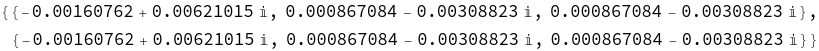
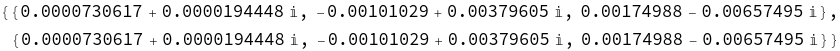

In [32]:
Options[MieVectorSphericalHarmonicNe1] = {"InputCoordinateSystem"->"Cartesian", "OutputVectorBase" -> "Cartesian"};
MieVectorSphericalHarmonicNe1[super_Integer, nn_, point_List, wavenumber_, OptionsPattern[]]:= Module[{n, bessel, rho, theta, phi, VSH, etheta, ephi, er},
    n = toMap[nn];
    If[ !Apply[And, IntegerQ /@ n], Return[MieVectorSphericalHarmonic::Int,nn]];
    {er, etheta, ephi} = Transpose[IdentityMatrix[3]& /@ n]; 
    bessel = Switch[super, 
                    1, SphericalBesselJ,
                    3, SphericalHankelH1,
                    _, Return[Message[MieVectorSphericalHarmonic::PhysicalSolution]]];

    {rho, theta, phi} = Switch[OptionValue["InputCoordinateSystem"],
                              "Cartesian" , CoordinateTransform[ "Cartesian" -> "Spherical", point],
                              "Spherical", point,
                              _, Return[Message[MieVectorSphericalHarmonic::CoordinateSystem]]];
                                                    
    VSH  = Cos[phi] * MieTau[n, Cos[theta] ] * etheta -  Sin[phi] * MiePi[n, Cos[theta] ]* ephi;
    VSH *= (-n * bessel[n, #] + # * bessel[n-1, #])&[wavenumber * rho] ;
    VSH += Cos[phi] * bessel[n, wavenumber * rho] *(n*(n + 1)) * LegendreP[n, Cos[theta]] * er;
    VSH /= wavenumber * rho;
    VSH = Switch[OptionValue["OutputVectorBase"],
                             "Cartesian" , Map[Dot[SphericalToCartesian[theta, phi], #]&, VSH],
                             "Spherical", VSH,
                             _, Message[MieVectorSphericalHarmonic::VectorBase]];
    If[Length[nn] == 0, 
         VSH[[1]], 
         VSH ]]

MieVectorSphericalHarmonicNe1[3,{1,1}, 60*{1,1,1}, 1.]
MieVectorSphericalHarmonicNe1[3,{1,1}, 60*{1,1,1}, 1., "OutputVectorBase" -> "Spherical"]

### VSH

-Graphics3D-
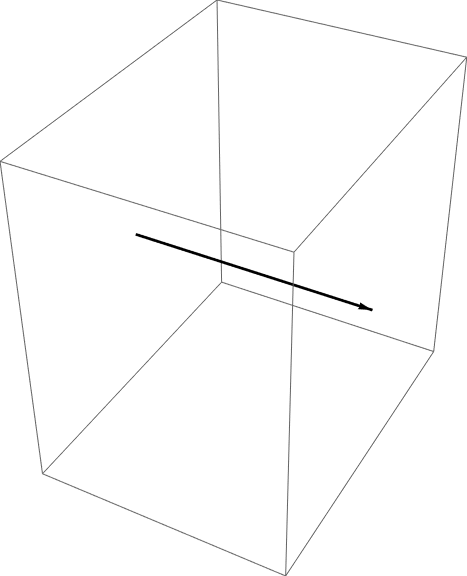

In [130]:
twoaxes3DArrow =  {Black, Opacity[1], Thick, Arrowheads[Medium], Arrow[{{{0, 0, 0}, {0, 0,0}}, {{0, 0, 0}, {1.5, 0, 0}}}]};
Graphics3D[twoaxes3DArrow]

-Graphics-
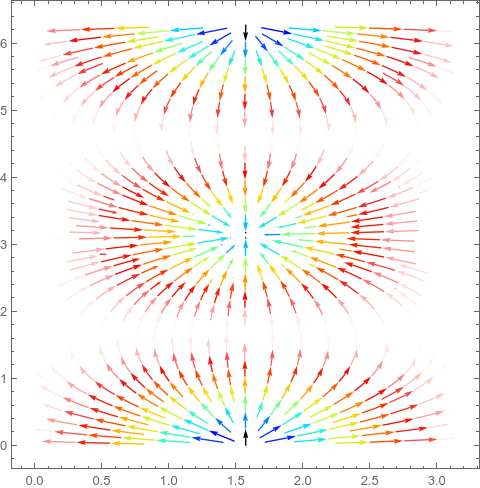

In [134]:
sp = {{0,0},{0,0}};

sp[[1,1]] = StreamPlot[Re[I*MieVectorSphericalHarmonicNe1[3,1, {1,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"][[2;;]]],
                        {th, 0, Pi},{ph, 0, 2*Pi}, 
                        StreamPoints-> Fine,
                        StreamColorFunction -> JetExtended]
sp[[1,2]] = StreamPlot[Re[-MieVectorSphericalHarmonicMo1[3,1, {1,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"][[2;;]] ],
                        {th, 0, Pi},{ph, 0, 2*Pi}, 
                        StreamPoints-> Fine,
                        StreamColorFunction -> JetExtended];

sp[[2,1]] = StreamPlot[Re[ I * MieVectorSphericalHarmonicNo1[3,2, {1,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"][[2;;]] ],
                        {th, 0, Pi},{ph, 0, 2*Pi}, 
                        StreamPoints-> Fine,
                        StreamColorFunction -> JetExtended];
sp[[2,2]] = StreamPlot[Re[-MieVectorSphericalHarmonicMe1[3,2, {1,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"][[2;;]] ],
                        {th, 0, Pi},{ph, 0, 2*Pi}, 
                        StreamPoints-> Fine,
                        StreamColorFunction -> JetExtended];

{-Graphics3D-, -Graphics3D-}
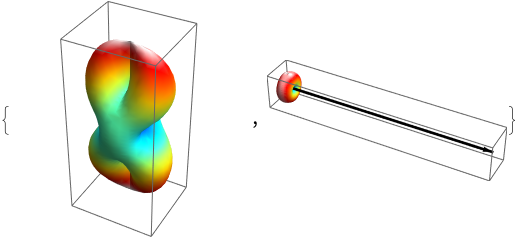

In [133]:
Show[{SphericalPlot3D[amp*Norm[I*MieVectorSphericalHarmonicNe1[3,1, {#,th,ph}, 2*Pi/500,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"]],
            {th, 0, Pi},{ph, 0, 2*Pi},
            ColorFunctionScaling -> True,PlotRange-> All,
            ColorFunction ->  (JetExtended[#6]&),
            Mesh -> False, Axes -> False, PlotRange -> All, Boxed -> True],Graphics3D@twoaxes3DArrow}]&/@{1, 500}

-Graphics3D-
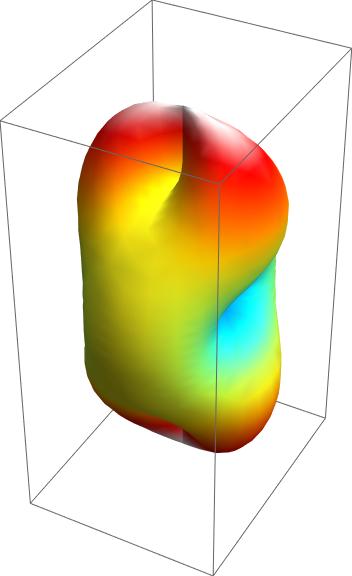

In [139]:
nrm = {{0,0},{0,0}};
amp = 1;
nrm[[1,1]] = SphericalPlot3D[amp*Norm[MieVectorSphericalHarmonicNe1[3,1, {2,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"]],
            {th, 0, Pi},{ph, 0, 2*Pi},
            ColorFunctionScaling -> True,
            ColorFunction ->  (JetExtended[#6]&),
            Mesh -> False, Axes -> False, PlotRange -> All]
nrm[[1,2]] = SphericalPlot3D[Norm[MieVectorSphericalHarmonicMo1[3,1, {2,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"]],
            {th, 0, Pi},{ph, 0, 2*Pi},
            ColorFunctionScaling -> True,
            ColorFunction ->  (JetExtended[#6]&),
            Mesh -> False, Axes -> False, PlotRange -> All];
amp = 1;
nrm[[2,1]] = SphericalPlot3D[amp*Norm[MieVectorSphericalHarmonicNo1[3,2, {2,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"] ],
            {th, 0, Pi},{ph, 0, 2*Pi},
            ColorFunctionScaling -> True,
            ColorFunction ->  (JetExtended[#6]&),
            Mesh -> False, Axes -> False, PlotRange -> All];
amp = 1;
nrm[[2,2]] = SphericalPlot3D[.8*Norm[MieVectorSphericalHarmonicMe1[3,2, {2,th,ph},1.,"InputCoordinateSystem" -> "Spherical","OutputVectorBase" -> "Spherical"] ],
            {th, 0, Pi},{ph, 0, 2*Pi},
            ColorFunctionScaling -> True,
            ColorFunction ->  (JetExtended[#6]&),
            Mesh -> False, Axes -> False, PlotRange -> All];

-Graphics3D--Graphics3D--Graphics3D--Graphics3D-
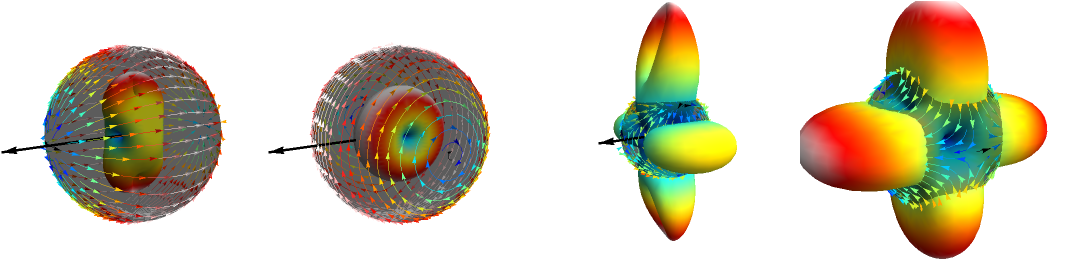

In [147]:
sp3d = Map[ Graphics3D[#[[1]] /. Arrow[z_] :> Arrow[z /. {y_Real, x_Real} :> {Cos[x] Sin[y], Sin[y] Sin[x],  Cos[y]}]  ]&, sp, {2}];
sp3d = Map[ Graphics3D[{Black,Opacity[.4],Sphere[], Opacity[1],#[[1]],twoaxes3DArrow}]&, sp3d,{2}];
sp3d = Array[ Show[{sp3d[[#1,#2]], nrm[[#1,#2]] }, Boxed -> False, ImageSize -> 200,ViewVector -> {5 {Cos[t], Sin[t], .25} /. t -> Pi/3, {0, 0, 0}}]&, {2,2}];
Flatten[sp3d] // Row

In [83]:
names = {{"Nel1","Mol1"},{"Nel2","Mol2"}};
MapThread[Export[#1<>".svg",#2]&,{names,sp3d},2]

{{Nel1.svg, Mol1.svg}, {Nel2.svg, Mol2.svg}}

-Graphics-
0-RBar_h.svg
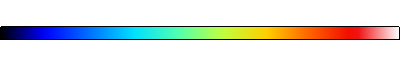

In [85]:
DensityPlot[x, {x, 0, 1}, {y, 0, 1}, BaseStyle -> texStyle, 
  FrameTicks -> {{None, None}, {None, None}},
  FrameStyle -> Black, 
  AspectRatio -> 1/30, 
  PlotRange -> All, ColorFunction -> JetExtended, 
  PlotPoints -> 40, PlotRangePadding -> None, 
 ImageSize -> {150, 25}*2]
 Export["0-RBar_h.svg", %]

### Field

In [36]:
MieField::Mesh = "The mesh `1` is not an array of 3D vectors"
MieField::Parallel = "The Paralellize option `1` must be either True or False"

The mesh `1` is not an array of 3D vectors
The Paralellize option `1` must be either True or False

In [ ]:
 Options[MieScatteredElectricField] = {"InputCoordinateSystem"->"Cartesian", "OutputVectorBase" -> "Spherical", "Parallelize"-> False};
MieScatteredElectricField[initialMesh_, indices_, wlength_, radius_,  OptionsPattern[]]:= Module[{mesh, x, poles, coeff, Nen1, Mon1, field,oddVSH,evenVSH, map},
    If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
    If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieScatteredElectricField::Mesh,initialMesh]] ];
    If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
             Return[Message[MieCoefficient::list, wlength, radius]]
    ];
    mesh = Switch[OptionValue["InputCoordinateSystem"],
                             "Cartesian", mesh,
                             "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                             ];
    map = Switch[OptionValue["Parallelize"],
                     False, Map,
                     True, ParallelMap,
                     _, Return[Message[MieInternalElectricField::Parallel, OptionValue["Paralellize"]
                     ];

    x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
    poles = Range[Ceiling[x + 4.*x^(1./3) + 2.]];(*Wacombe criteria for convergence*)
    coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];

    evenVSH = MieVectorSphericalHarmonicNe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
    oddVSH =  MieVectorSphericalHarmonicMo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

    Nen1 = map[ If[Norm[#] < radius,
                                ConstantArray[{0,0,0}, Length[poles]],
                            evenVSH[3,#,1.]]&, mesh,{-2}];
    Nen1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Nen1]; (*[[7,3,grid-rev]]*)
    Mon1 = map[ If[Norm[#] < radius,
                                ConstantArray[{0,0,0}, Length[poles]],
                            oddVSH[3,#,1.]]&, mesh,{-2}];
    Mon1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Mon1];  (*[[7,3,grid-rev]]*)

    field = {I, -1} * MieCoefficient[poles, x, Divide @@ Reverse[indices]] * {Nen1, Mon1 } ; (*[[ 2 = {iaN,-bM}, 7, 3, grid ]]  *)
    field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
 Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]

MieScatteredElectricField[initialMesh_, indices_, wlength_, radius_, pole_, OptionsPattern[]]:= Module[{mesh, x, poles, coeff, Nen1, Mon1, field,oddVSH,evenVSH, map},
    If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
    If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieScatteredElectricField::Mesh,initialMesh]] ];
    If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
            Return[Message[MieCoefficient::list, wlength, radius]]
    ];
    If[! Apply[Equal, IntegerQ /@ toMap[pole]],
           Return[Message[MieCoefficient::int, #]] & /@ toMap[pole]
    ];
    mesh = Switch[OptionValue["InputCoordinateSystem"],
                            "Cartesian", mesh,
                            "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                            ];
    map = Switch[OptionValue["Parallelize"],
                    False, Map,
                    True, ParallelMap,
                    _, Return[Message[MieInternalElectricField::Parallel, OptionValue["Paralellize"]
                    ];

    x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
    If[Length[pole] == 0,
           poles = Range[pole],
           poles = pole];
    coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];

    evenVSH = MieVectorSphericalHarmonicNe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
    oddVSH =  MieVectorSphericalHarmonicMo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

    Nen1 = map[ If[Norm[#] < radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           evenVSH[3,#,1.]]&, mesh,{-2}];
    Nen1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Nen1]; (*[[7,3,grid-rev]]*)
    Mon1 = map[ If[True (*Norm[#] < radius*),
                               ConstantArray[{0,0,0}, Length[poles]],
                           oddVSH[3,#,1.]]&, mesh,{-2}];
    Mon1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Mon1];  (*[[7,3,grid-rev]]*)

    field = {I, -1} * MieCoefficient[poles, x, Divide @@ Reverse[indices]] * {Nen1, Mon1 } ; (*[[ 2 = {iaN,-bM}, 7, 3, grid ]]  *)
    field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
 Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]


In [254]:
Options[MieInternalElectricField] = {"InputCoordinateSystem"->"Cartesian", "OutputVectorBase" -> "Spherical", "Parallelize"-> False};
MieInternalElectricField[initialMesh_, indices_, wlength_, radius_,  OptionsPattern[]]:= Module[{mesh, x, poles, coeff, Nen1, Mon1, field,oddVSH,evenVSH, map},
   If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
   If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieScatteredElectricField::Mesh,initialMesh]] ];
   If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
            Return[Message[MieCoefficient::list, wlength, radius]]
   ];
   mesh = Switch[OptionValue["InputCoordinateSystem"],
                            "Cartesian", mesh,
                            "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                            ];
   map = Switch[OptionValue["Parallelize"],
                    False, Map,
                    True, ParallelMap,
                    _, Return[Message[MieInternalElectricField::Parallel, OptionValue["Paralellize"]
                    ];

   x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
   poles = Range[Ceiling[x + 4.*x^(1./3) + 2.]];(*Wacombe criteria for convergence*)
   coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];
   m = Divide @@ Reverse[indices];

   evenVSH = MieVectorSphericalHarmonicNe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
   oddVSH =  MieVectorSphericalHarmonicMo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

   Nen1 = map[ If[Norm[#] > radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           evenVSH[1,#,m]]&, mesh,{-2}];
   Nen1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Nen1]; (*[[7,3,grid-rev]]*)
   Mon1 = map[ If[Norm[#] > radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           oddVSH[1,#,m]]&, mesh,{-2}];
   Mon1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Mon1];  (*[[7,3,grid-rev]]*)

   field = {1, -I} * MieCoefficientInt[poles, x, m] * {Nen1, Mon1 } ; (*[[ 2 = {iaN,-bM}, 7, 3, grid ]]  *)
   field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]

MieInternalElectricField[initialMesh_, indices_, wlength_, radius_, pole_, OptionsPattern[]]:= Module[{mesh, x, poles, coeff, Nen1, Mon1, field,oddVSH,evenVSH, map},
   If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
   If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieScatteredElectricField::Mesh,initialMesh]] ];
   If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
           Return[Message[MieCoefficient::list, wlength, radius]]
   ];
   If[! Apply[Equal, IntegerQ /@ toMap[pole]],
          Return[Message[MieCoefficient::int, #]] & /@ toMap[pole]
   ];
   mesh = Switch[OptionValue["InputCoordinateSystem"],
                           "Cartesian", mesh,
                           "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                           ];
   map = Switch[OptionValue["Parallelize"],
                   False, Map,
                   True, ParallelMap,
                   _, Return[Message[MieInternalElectricField::Parallel, OptionValue["Paralellize"]
                   ];

   x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
   If[Length[pole] == 0,
          poles = Range[pole],
          poles = pole];
   coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];
   m = Divide @@ Reverse[indices];

   evenVSH = MieVectorSphericalHarmonicNe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
   oddVSH =  MieVectorSphericalHarmonicMo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

   Nen1 = map[ If[Norm[#] > radius,
                              ConstantArray[{0,0,0}, Length[poles]],
                          evenVSH[3,#, m]]&, mesh,{-2}];
   Nen1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Nen1]; (*[[7,3,grid-rev]]*)
   Mon1 = map[ If[Norm[#] > radius,
                              ConstantArray[{0,0,0}, Length[poles]],
                          oddVSH[3,#, m]]&, mesh,{-2}];
   Mon1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Mon1];  (*[[7,3,grid-rev]]*)

   field = {1, -I} * MieCoefficient[poles, x, m] * {Nen1, Mon1 } ; (*[[ 2 = {iaN,-bM}, 7, 3, grid ]]  *)
   field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]

The mesh `1` is not an array of 3D vectors
The Paralellize option `1` must be either True or False

# Drude

In [74]:
nDrude = Sqrt@DrudeEpsEnergy[hcPlanckSpeed/#,10., 0.015]&;
radius = 30.;
mesh = N[Array[{#1,0.,#2}&,{25,25}, 3. * radius *{{1,-1},{1,-1}}]];
dataxz = {{0,0},{0,0}};

lda = 342.;
indices = {1.33, nDrude[lda]}
AbsoluteTiming[ dataxz[[1,1]] = MieScatteredElectricField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ dataxz[[1,2]] = MieInternalElectricField[mesh,indices, lda, radius, "Parallelize" -> True]; ]



LinkObject::linkv: Argument Null in LinkWrite[Null, MessagePacket[ArcTan, indet]] is not a valid LinkObject.

LinkObject::linkv: Argument Null in LinkWrite[Null, MessagePacket[ArcTan, indet]] is not a valid LinkObject.

LinkObject::linkv: Argument Null in LinkWrite[Null, MessagePacket[ArcTan, indet]] is not a valid LinkObject.

General::stop: Further output of LinkObject::linkv will be suppressed during this calculation.

{1.33, 0.00611529 + 2.5687 I}
{8.35913, Null}
{1.20216, Null}

In [82]:
nDrude[lda]

0.00611529 + 2.5687 I

{{-Graphics-, -Graphics-}, {-Graphics-, -Graphics-}}
{-Graphics-, -Graphics-}
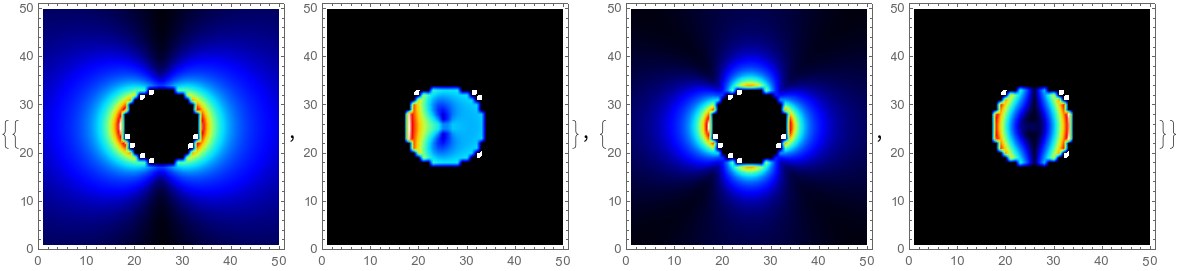
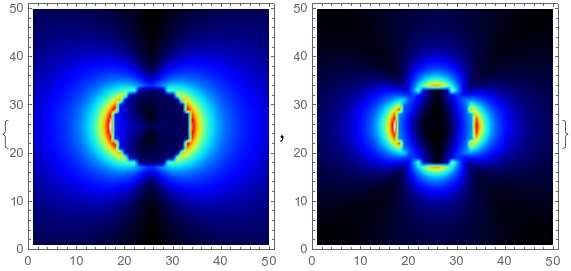

In [467]:
plotDens[data_]:=ListDensityPlot[Map[Chop@Norm, data,{-2}], InterpolationOrder -> 1, PlotRange -> All, ColorFunctionScaling -> True, ColorFunction -> JetExtended, Mesh->None, ImageSize -> 200]
Map[plotDens, dataxz, {2}]
Map[plotDens, Plus @@@ dataxz]

In [470]:
radius = 30.;
mesh = N[Array[{0.00001,#1,#2}&,{50,50}, 3. * radius *{{1,-1},{1,-1}}]];
datayz = {{0,0},{0,0}};

lda = 342.;
indices = {1.33, nDrude[lda]};
AbsoluteTiming[ datayz[[1,1]] = MieScatteredElectricField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ datayz[[1,2]] = MieInternalElectricField[mesh,indices, lda, radius, "Parallelize" -> True]; ]


lda = 262.;
indices = {1.33, nDrude[lda]};
AbsoluteTiming[ datayz[[2,1]] = MieScatteredElectricField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ datayz[[2,2]] = MieInternalElectricField[mesh,indices, lda, radius, "Parallelize" -> True]; ]

{19.3129, Null}
{2.48996, Null}
{23.7962, Null}
{2.43677, Null}

{{-Graphics-, -Graphics-}, {-Graphics-, -Graphics-}}
{-Graphics-, -Graphics-}
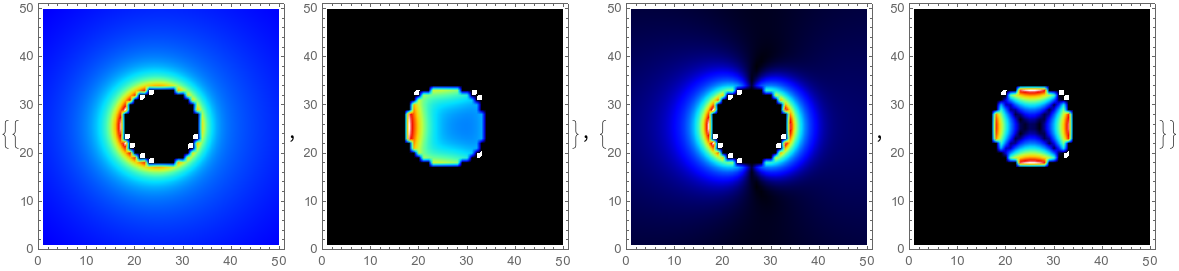
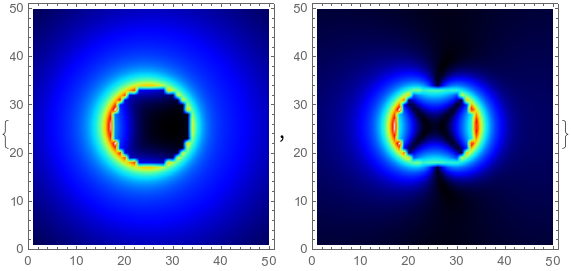

In [481]:
Map[plotDens, datayz, {2}]
Map[plotDens, Plus @@@ datayz]

In [409]:
(*Scattered H Field*)
 Options[MieScatteredHField] = {"InputCoordinateSystem"->"Cartesian", "OutputVectorBase" -> "Spherical", "Parallelize"-> False};
MieScatteredHField[initialMesh_, indices_, wlength_, radius_,  OptionsPattern[]]:= 
 Module[{mesh, x, poles, coeff, Men1, Non1, field,oddVSH,evenVSH, map},
    If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
    If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieField::Mesh,initialMesh]] ];
    If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
             Return[Message[MieCoefficient::list, wlength, radius]]
    ];
    mesh = Switch[OptionValue["InputCoordinateSystem"],
                             "Cartesian", mesh,
                             "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                             ];
    map = Switch[OptionValue["Parallelize"],
                     False, Map,
                     True, ParallelMap,
                     _, Return[Message[MieField::Parallel, OptionValue["Paralellize"]
                     ];

    x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
    poles = Range[Ceiling[x + 4.*x^(1./3) + 2.]];(*Wacombe criteria for convergence*)
    coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];

    evenVSH = MieVectorSphericalHarmonicMe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
    oddVSH =  MieVectorSphericalHarmonicNo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

    Men1 = map[ If[Norm[#] < radius,
                                ConstantArray[{0,0,0}, Length[poles]],
                            evenVSH[3,#,1.]]&, mesh,{-2}];
    Men1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Men1]; (*[[7,3,grid-rev]]*)
    Non1 = map[ If[Norm[#] < radius,
                                ConstantArray[{0,0,0}, Length[poles]],
                            oddVSH[3,#,1.]]&, mesh,{-2}];
    Non1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Non1];  (*[[7,3,grid-rev]]*)

    field = {-1, -I} * MieCoefficient[poles, x, Divide @@ Reverse[indices]] * {Men1, Non1 } ; (*[[ 2 = {iaN,-bM}, 7, 3, grid ]]  *)
    field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
 Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]

MieScatteredHField[initialMesh_, indices_, wlength_, radius_, pole_, OptionsPattern[]]:= 
 Module[{mesh, x, poles, coeff, Men1, Non1, field,oddVSH,evenVSH, map},
    If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
    If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieField::Mesh,initialMesh]] ];
    If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
            Return[Message[MieCoefficient::list, wlength, radius]]
    ];
    If[! Apply[Equal, IntegerQ /@ toMap[pole]],
           Return[Message[MieCoefficient::int, #]] & /@ toMap[pole]
    ];
    mesh = Switch[OptionValue["InputCoordinateSystem"],
                            "Cartesian", mesh,
                            "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                            ];
    map = Switch[OptionValue["Parallelize"],
                    False, Map,
                    True, ParallelMap,
                    _, Return[Message[MieField::Parallel, OptionValue["Paralellize"]
                    ];

    x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
    If[Length[pole] == 0,
           poles = Range[pole],
           poles = pole];
    coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];

    evenVSH = MieVectorSphericalHarmonicMe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
    oddVSH =  MieVectorSphericalHarmonicNo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

    Men1 = map[ If[Norm[#] < radius,
                                ConstantArray[{0,0,0}, Length[poles]],
                            evenVSH[3,#,1.]]&, mesh,{-2}];
    Men1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Men1]; (*[[7,3,grid-rev]]*)
    Non1 = map[ If[Norm[#] < radius,
                                ConstantArray[{0,0,0}, Length[poles]],
                            oddVSH[3,#,1.]]&, mesh,{-2}];
    Non1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Non1];  (*[[7,3,grid-rev]]*)

    field = {-1, -I} * MieCoefficient[poles, x, Divide @@ Reverse[indices]] * {Men1, Non1 } ; (*[[ 2 = {iaN,-bM}, 7, 3, grid ]]  *)
    field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
 Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]

The mesh `1` is not an array of 3D vectors
The Paralellize option `1` must be either True or False

In [435]:
Options[MieInternalHField] = {"InputCoordinateSystem"->"Cartesian", "OutputVectorBase" -> "Spherical", "Parallelize"-> False};
MieInternalHField[initialMesh_, indices_, wlength_, radius_,  OptionsPattern[]]:= 
 Module[{mesh, x, poles, coeff, Men1, Non1, field,oddVSH,evenVSH, map},
   If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
   If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieField::Mesh,initialMesh]] ];
   If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
            Return[Message[MieCoefficient::list, wlength, radius]]
   ];
   mesh = Switch[OptionValue["InputCoordinateSystem"],
                            "Cartesian", mesh,
                            "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                            ];
   map = Switch[OptionValue["Parallelize"],
                    False, Map,
                    True, ParallelMap,
                    _, Return[Message[MieField::Parallel, OptionValue["Paralellize"]
                    ];

   x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
   poles = Range[Ceiling[x + 4.*x^(1./3) + 2.]];(*Wacombe criteria for convergence*)
   coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];
   m = Divide @@ Reverse[indices];

   evenVSH = MieVectorSphericalHarmonicMe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
   oddVSH =  MieVectorSphericalHarmonicNo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

   Men1 = map[ If[Norm[#] < radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           evenVSH[1,#,m]]&, mesh,{-2}];
   Men1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Men1]; (*[[7,3,grid-rev]]*)
   Non1 = map[ If[Norm[#] < radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           oddVSH[1,#,m]]&, mesh,{-2}];
   Non1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Non1];  (*[[7,3,grid-rev]]*)

   field = {-I, -1} * MieCoefficientInt[poles, x, m] * {Non1, Men1 } ; (*[[ 2 = {iaN,-nM}, 7, 3, grid ]]  *)
   field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
  Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]

MieInternalHField[initialMesh_, indices_, wlength_, radius_, pole_, OptionsPattern[]]:= 
 Module[{mesh, x, poles, coeff, Men1, Non1, field,oddVSH,evenVSH, map},
   If[Length[Dimensions[initialMesh]] == 1, mesh = {initialMesh}, mesh = initialMesh];
   If[ Dimensions[mesh][[-1]] != 3, Return[Message[MieField::Mesh,initialMesh]] ];
   If[! Apply[Equal, Length /@ {wlength, radius, 0., indices[[1]], indices[[2]]}],
           Return[Message[MieCoefficient::list, wlength, radius]]
   ];
   If[! Apply[Equal, IntegerQ /@ toMap[pole]],
          Return[Message[MieCoefficient::int, #]] & /@ toMap[pole]
   ];
   mesh = Switch[OptionValue["InputCoordinateSystem"],
                           "Cartesian", mesh,
                           "Spherical", Map[CoordinateTransform["Spherical" -> "Cartesian" , #]&, mesh, {-2}]
                           ];
   map = Switch[OptionValue["Parallelize"],
                   False, Map,
                   True, ParallelMap,
                   _, Return[Message[MieField::Parallel, OptionValue["Paralellize"]
                   ];

   x = (2.*Pi*radius)*indices[[1]]/wlength;    (*Size parameter*)
   If[Length[pole] == 0,
          poles = Range[pole],
          poles = pole];
   coeff = Map[ (I^#*(2.*#+1.)/(#*(#+1.)) )&, poles];
   m = Divide @@ Reverse[indices];

   evenVSH = MieVectorSphericalHarmonicMe1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;
   oddVSH =  MieVectorSphericalHarmonicNo1[#1, poles, #2, #3 * x/radius, "InputCoordinateSystem" -> OptionValue["InputCoordinateSystem"], "OutputVectorBase" -> OptionValue["OutputVectorBase"]]&;

   Men1 = map[ If[Norm[#] < radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           evenVSH[1,#,m]]&, mesh,{-2}];
   Men1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Men1]; (*[[7,3,grid-rev]]*)
   Non1 = map[ If[Norm[#] < radius,
                               ConstantArray[{0,0,0}, Length[poles]],
                           oddVSH[1,#,m]]&, mesh,{-2}];
   Non1 = Transpose[Transpose[#, Reverse@Range@Length@Dimensions[#]]]&[Non1];  (*[[7,3,grid-rev]]*)

   field = {-I, -1} * MieCoefficientInt[poles, x, m] * {Non1, Men1 } ; (*[[ 2 = {iaN,-nM}, 7, 3, grid ]]  *)
   field = Plus @@ Plus @@ field;  (*[[ 7}, 3, grid ]] --> , [[3, grid ]]  *)
 Transpose[#, Reverse@Range@Length@Dimensions[#]]&[field]
]


The mesh `1` is not an array of 3D vectors
The Paralellize option `1` must be either True or False

In [483]:
radius = 30.;
mesh = N[Array[{#1,0.,#2}&,{50,50}, 3. * radius *{{1,-1},{1,-1}}]];
dataxz = {{0,0},{0,0}};

lda = 342.;
indices = {1.33, nDrude[lda]};
AbsoluteTiming[ dataxz[[1,1]] = MieScatteredHField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ dataxz[[1,2]] = MieInternalHField[mesh,indices, lda, radius, "Parallelize" -> True]; ]


lda = 262.;
indices = {1.33, nDrude[lda]};
AbsoluteTiming[ dataxz[[2,1]] = MieScatteredHField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ dataxz[[2,2]] = MieInternalHField[mesh,indices, lda, radius, "Parallelize" -> True]; ]

{20.2718, Null}
{2.56471, Null}
{20.3477, Null}
{2.29016, Null}

{{-Graphics-, -Graphics-}, {-Graphics-, -Graphics-}}
{-Graphics-, -Graphics-}
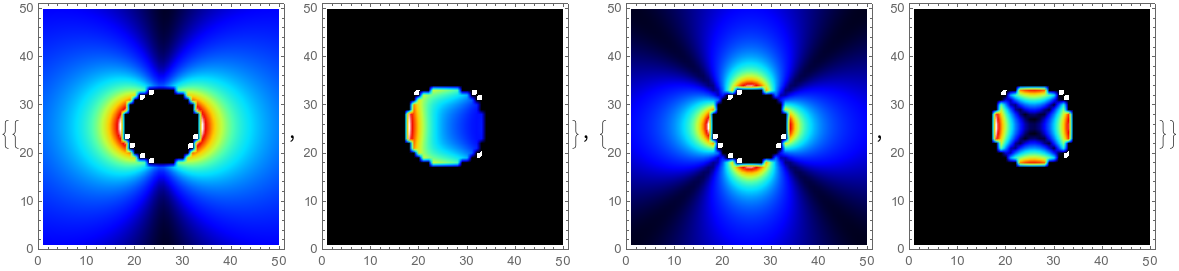
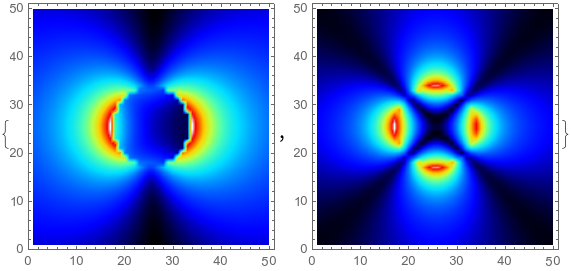

In [494]:
plotDens[data_]:=ListDensityPlot[Map[Chop@Norm, data,{-2}], InterpolationOrder -> 1, PlotRange -> All, ColorFunctionScaling -> True, ColorFunction -> JetExtended, Mesh->None, ImageSize -> 200]
Map[plotDens, dataxz, {2}]
Map[plotDens, Plus @@@ dataxz]

In [ ]:
nDrude = Sqrt@DrudeEpsEnergy[hcPlanckSpeed/#,10., 0.015]&;

radius = 30.;
dataE = {{0,0},{0,0}};
lda = 342.;
indices = {1.33, nDrude[lda]};

mesh = N[Array[{#1,0.,#2}&,{50,50}, 3. * radius *{{1,-1},{1,-1}}]];
AbsoluteTiming[ dataE[[1,1]] = MieScatteredElectricField[mesh,indices, lda, radius,{1}, "Parallelize" -> True];]

In [ ]:
radius = 30.;
mesh = N[Array[{0., #1 ,#2}&,{50,50}, 3. * radius *{{1,-1},{1,-1}}]];
dataxz = {{0,0},{0,0}};

lda = 342.;
indices = {1.33, nDrude[lda]};
AbsoluteTiming[ dataxz[[1,1]] = MieScatteredHField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ dataxz[[1,2]] = MieInternalHField[mesh,indices, lda, radius, "Parallelize" -> True]; ]


lda = 262.;
indices = {1.33, nDrude[lda]};
AbsoluteTiming[ dataxz[[2,1]] = MieScatteredHField[mesh,indices, lda, radius, "Parallelize" -> True];]
AbsoluteTiming[ dataxz[[2,2]] = MieInternalHField[mesh,indices, lda, radius, "Parallelize" -> True]; ]